<a href="https://www.kaggle.com/code/niharykasingh/loan-approval-prediction-model?scriptVersionId=222770793" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e10/sample_submission.csv
/kaggle/input/playground-series-s4e10/train.csv
/kaggle/input/playground-series-s4e10/test.csv


In [2]:
from IPython.display import Image;from datetime import date
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import warnings
warnings.filterwarnings('ignore')

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [7]:
# Loading the trained data 
train = pd.read_csv("/kaggle/input/playground-series-s4e10/train.csv")
train.shape # (58645, 13)
train.head()

(58645, 13)

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


In [8]:
# Loading the test data 
test = pd.read_csv("/kaggle/input/playground-series-s4e10/test.csv")
test.shape #(39098, 12)
test.head()

(39098, 12)

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,58645,23,69000,RENT,3.0,HOMEIMPROVEMENT,F,25000,15.76,0.36,N,2
1,58646,26,96000,MORTGAGE,6.0,PERSONAL,C,10000,12.68,0.10,Y,4
2,58647,26,30000,RENT,5.0,VENTURE,E,4000,17.19,0.13,Y,2
3,58648,33,50000,RENT,4.0,DEBTCONSOLIDATION,A,7000,8.90,0.14,N,7
4,58649,26,102000,MORTGAGE,8.0,HOMEIMPROVEMENT,D,15000,16.32,0.15,Y,4


In [9]:
# Check any missing value using info
train.info()
print("\n")
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

In [10]:
# Describe of numerical columns.
train.describe(include= np.number,percentiles = [0.01,.25, .5, .75,0.99]) 
print("\n")
#train.describe(exclude=np.number)
train.describe(include= ["object","category","bool"])

,id,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
count,58645.000000,58645.000000,5.864500e+04,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000
mean,29322.000000,27.550857,6.404617e+04,4.701015,9217.556518,10.677874,0.159238,5.813556,0.142382
std,16929.497605,6.033216,3.793111e+04,3.959784,5563.807384,3.034697,0.091692,4.029196,0.349445
min,0.000000,20.000000,4.200000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,0.000000
1%,586.440000,21.000000,2.160000e+04,0.000000,1286.000000,5.420000,0.030000,2.000000,0.000000
25%,14661.000000,23.000000,4.200000e+04,2.000000,5000.000000,7.880000,0.090000,3.000000,0.000000
50%,29322.000000,26.000000,5.800000e+04,4.000000,8000.000000,10.750000,0.140000,4.000000,0.000000
75%,43983.000000,30.000000,7.560000e+04,7.000000,12000.000000,12.990000,0.210000,8.000000,0.000000
99%,58057.560000,49.000000,1.750000e+05,17.000000,25000.000000,17.490000,0.420000,17.000000,1.000000
max,58644.000000,123.000000,1.900000e+06,123.000000,35000.000000,23.220000,0.830000,30.000000,1.000000


,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
count,58645,58645,58645,58645
unique,4,6,7,2
top,RENT,EDUCATION,A,N
freq,30594,12271,20984,49943


### Exploratory Data Analysis

In [11]:
target = 'loan_status'
num_cols = train.select_dtypes(np.number).columns
num_cols = [i for i in num_cols if i not in ["id",target]] # list comprehension
print(num_cols)

obj_cols = train.select_dtypes(include=['object','category','bool']).columns
obj_cols = [i for i in obj_cols if i not in ["id",target]] # list comprehension
print(obj_cols)

['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']
['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']


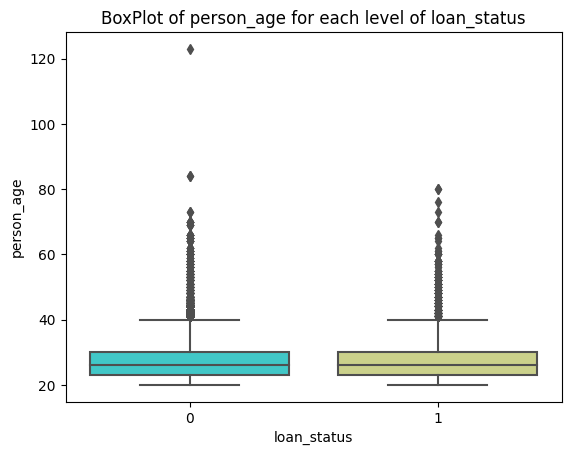

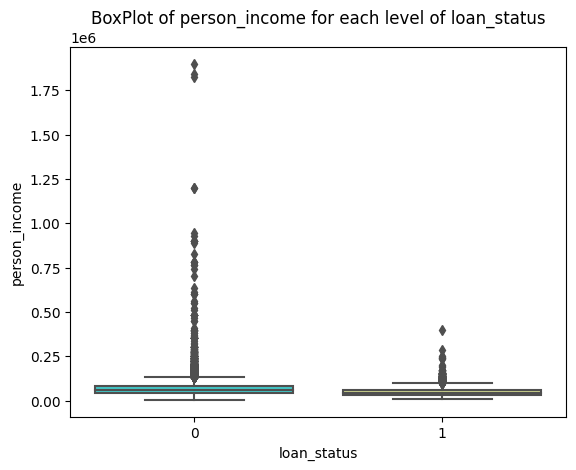

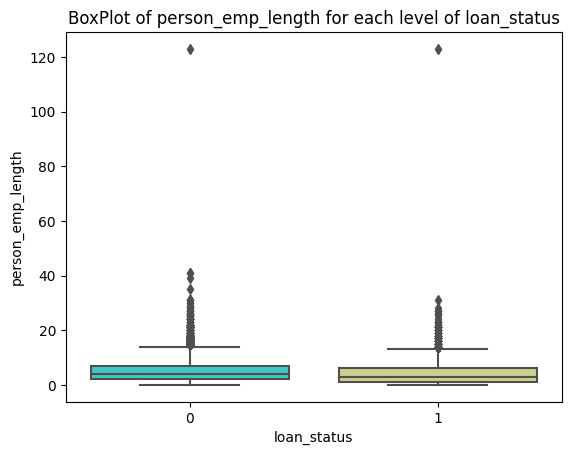

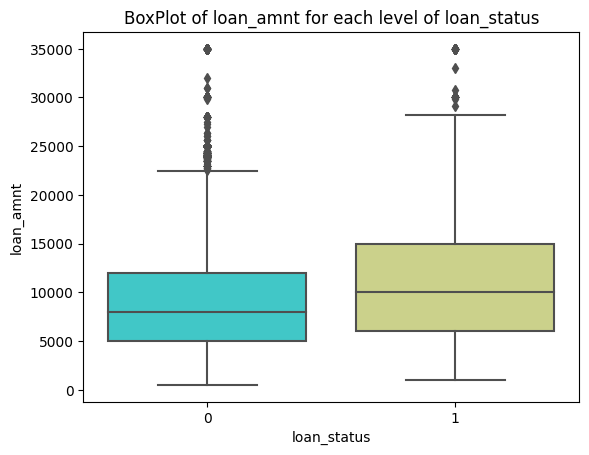

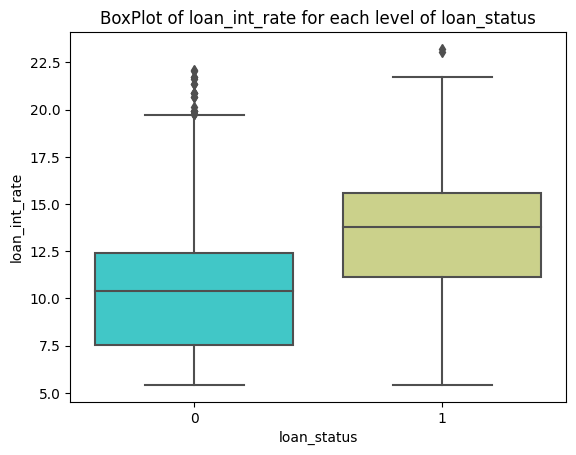

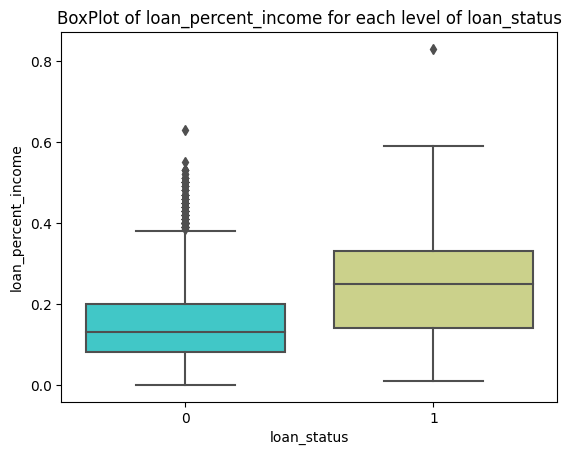

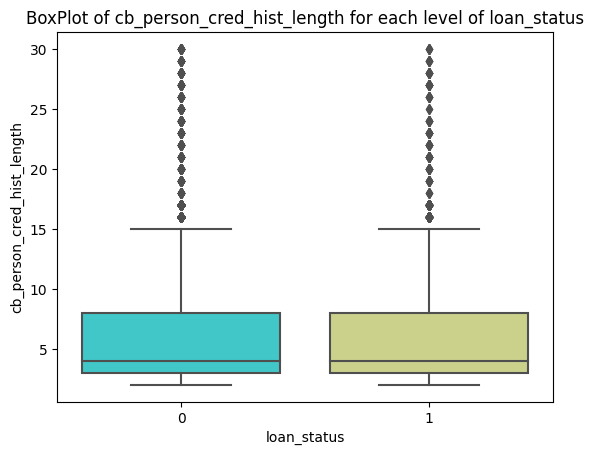

In [12]:
for i in num_cols:
    pfig = plt.figure();
    img = sns.boxplot(x=target,y=i,data=train,palette='rainbow').set_title(f'BoxPlot of {i} for each level of {target}');
    fig = img.get_figure();
    fig.savefig(i);
    #fig.clf(); # run this for not printing figure

### Observations from above Box-Plots
1. Box-Plot of Loan_status Vs Person_age, Loan_status Vs Person_income, Loan_status Vs Person_emp_length and cb_person_cred_hist_length Vs Loan_status are very similar.
2. Box-Plot of Loan_status Vs loan_amount, Box-Plot of Loan_status Vs loan_int_rate, Box-Plot of Loan_status Vs loan_int_rate
3. Box-Plot of Loan_status Vs loan_percent_income


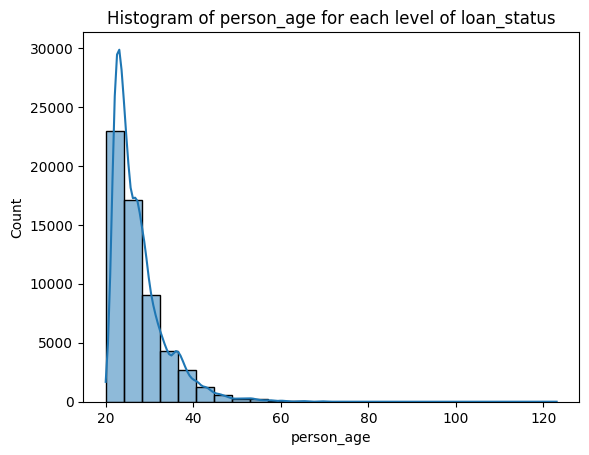

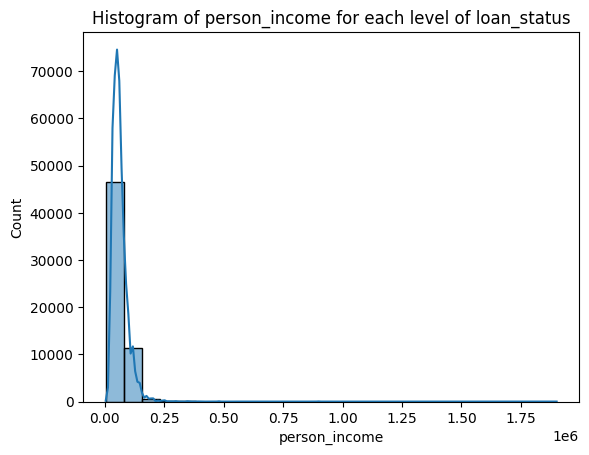

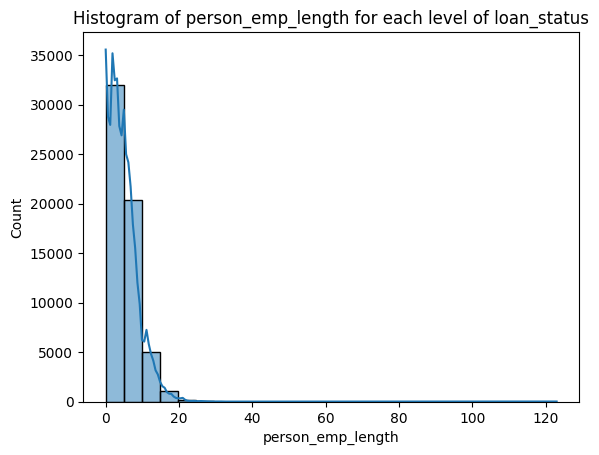

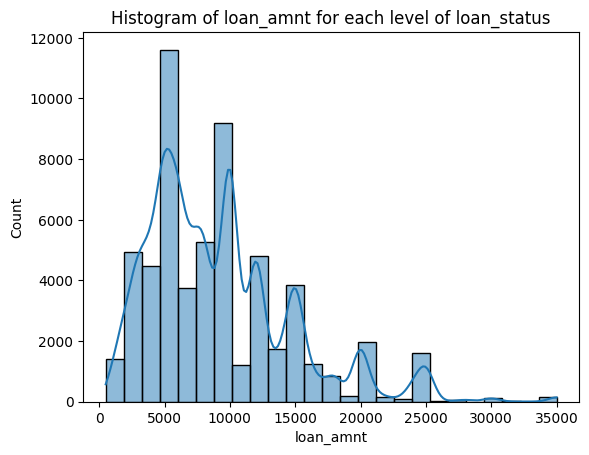

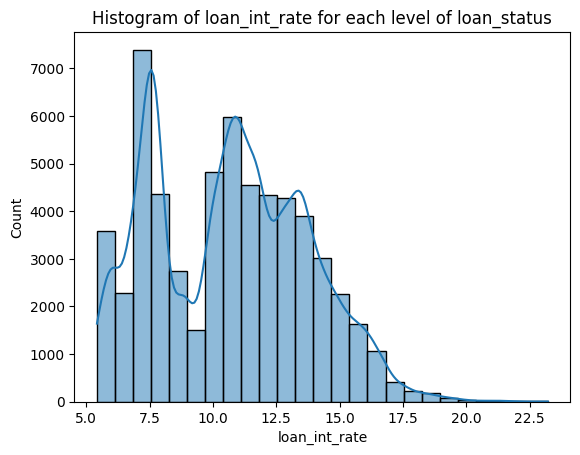

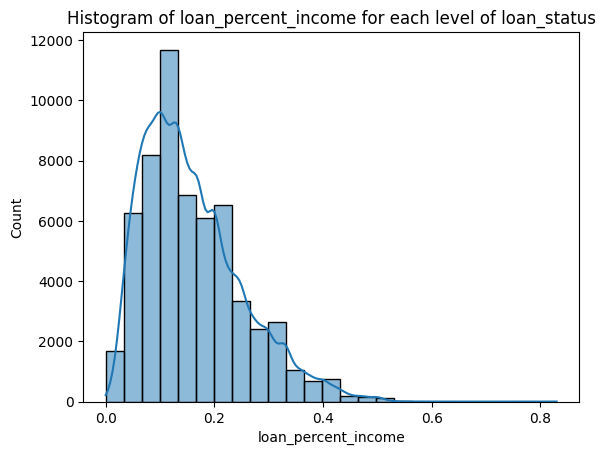

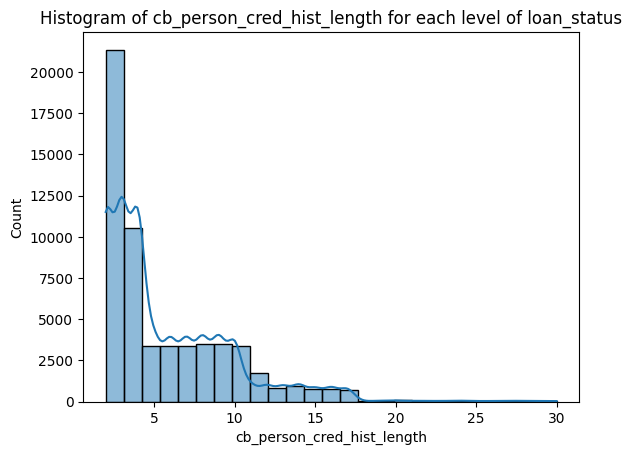

In [13]:
for i in num_cols:
    figg= plt.figure()
    image=sns.histplot(x=i,data=train,kde=True, bins=25).set_title(f'Histogram of {i} for each level of {target}')
    plt.show()

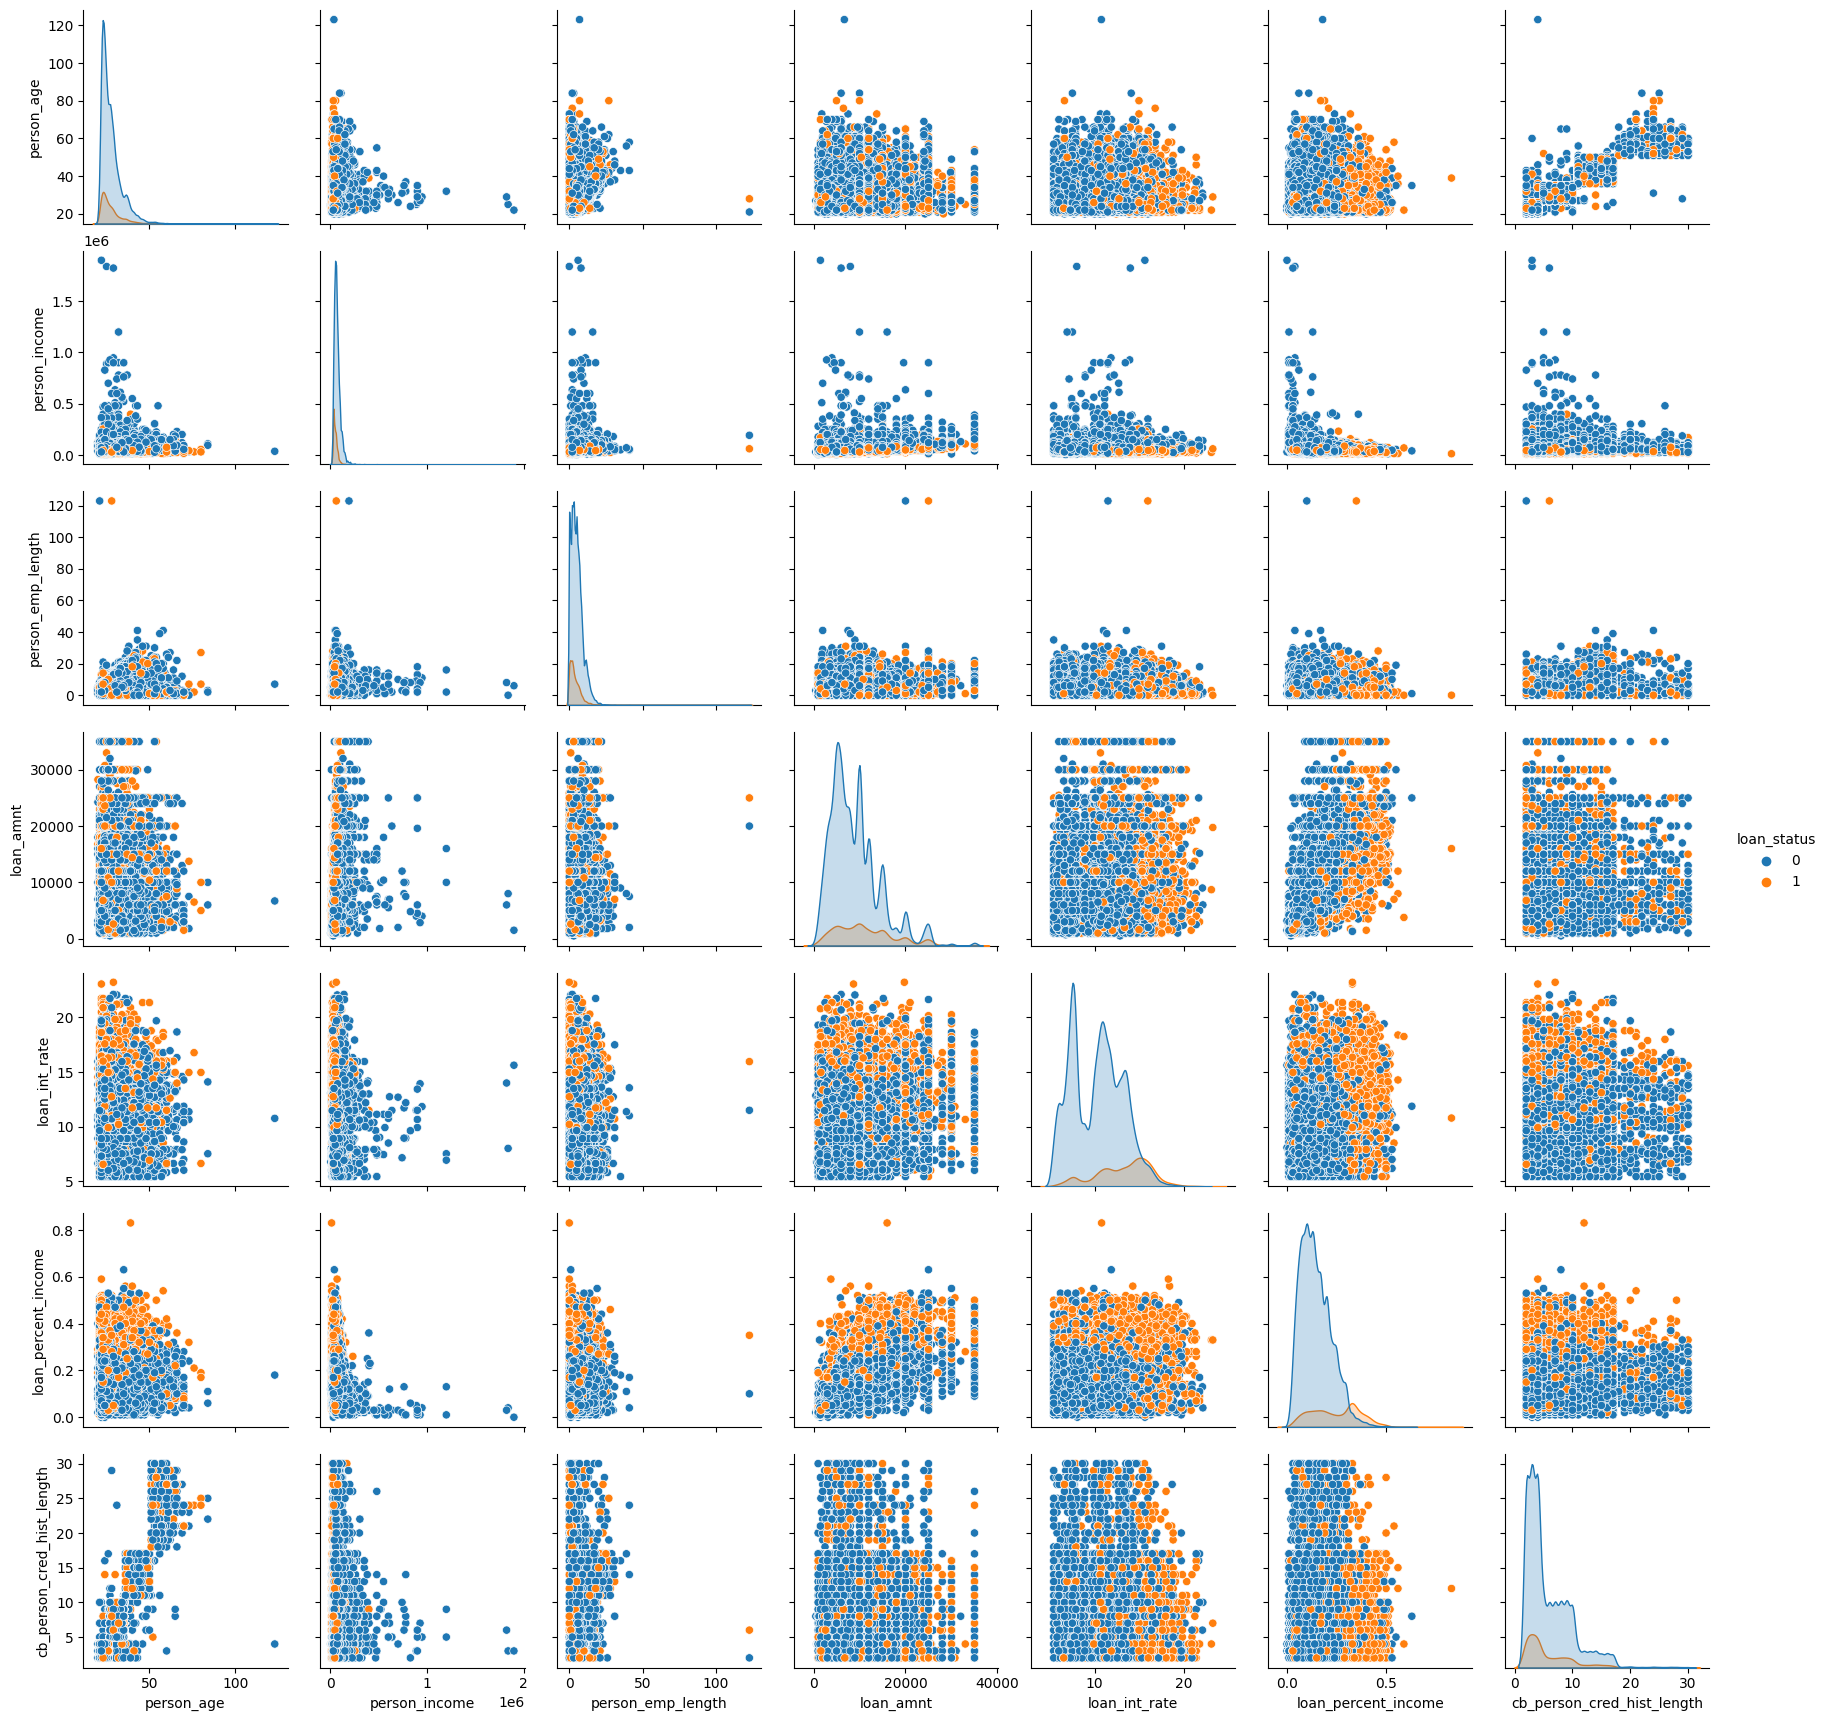

In [14]:
sns.pairplot(data = train[num_cols+[target]],hue = "loan_status")#set_title(f'Scatter-Plot of {i} for each level of {target}')
plt.show()


<Figure size 640x480 with 0 Axes>

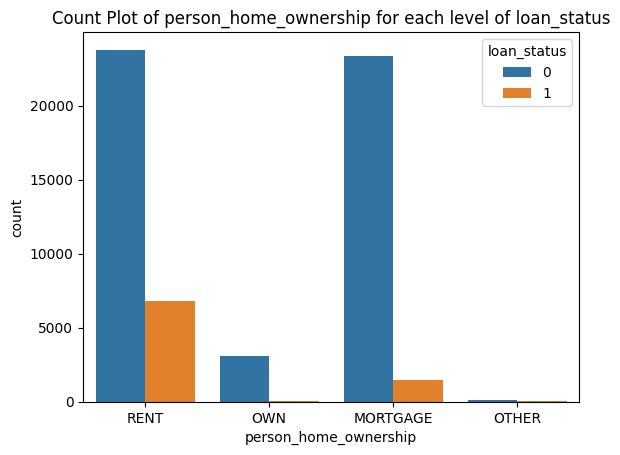

<Figure size 640x480 with 0 Axes>

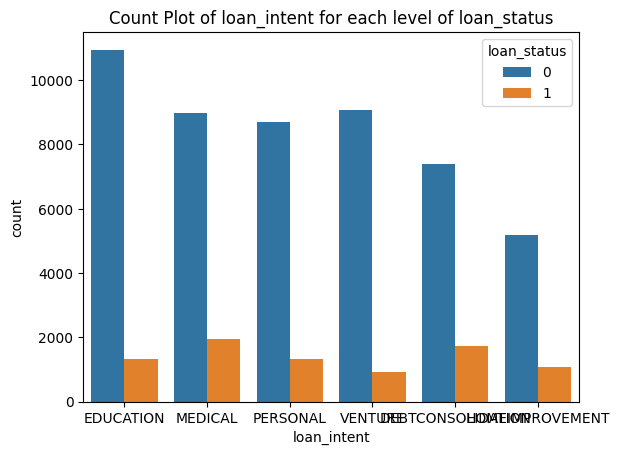

<Figure size 640x480 with 0 Axes>

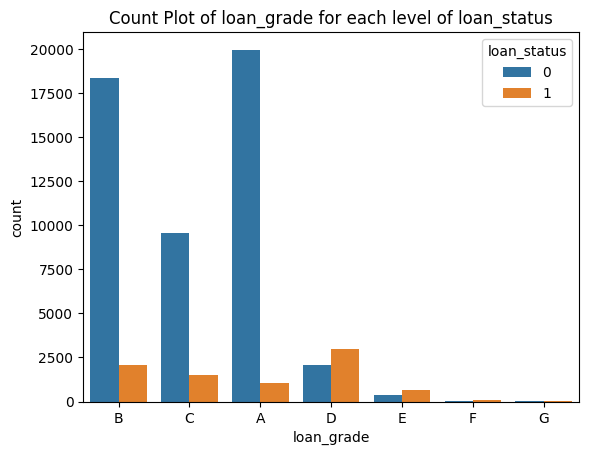

<Figure size 640x480 with 0 Axes>

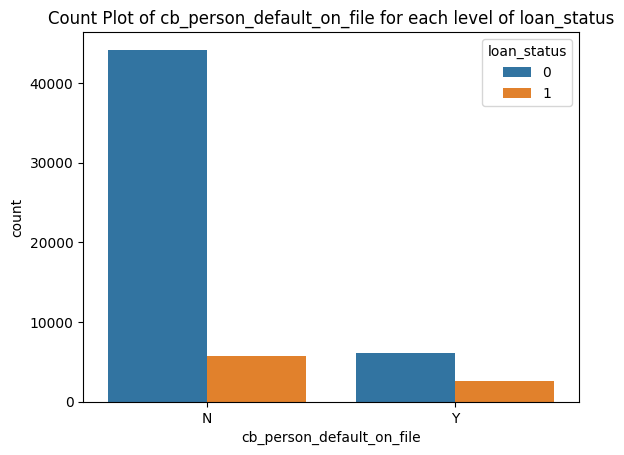

In [15]:
for i in obj_cols:
    plt.figure()
    #bar= sns.barplot(data=train,x=i,y="loan_amnt", hue=target).set_title(f'BarPlot of {i} for each level of {target}')
    cnt = sns.countplot(data=train, x=i, hue= target).\
    set_title(f'Count Plot of {i} for each level of {target}');
    plt.show()
#bar= sns.barplot(data=train,y="loan_amnt",x="cb_person_default_on_file", hue = target).set_title(f'BarPlot of {i} for each level of {target}')

### Feature Engineering

In [17]:
train['age_at_first_credit'] = train.person_age - train.cb_person_cred_hist_length
train['EMI_estimate'] = train.loan_amnt * train.loan_int_rate/100
train['loan_age_ratio'] = np.where(train.person_age > 0, train.loan_amnt / train.person_age, 0)
train['cred_hist_age_ratio'] = np.where(train.person_age > 0, train.cb_person_cred_hist_length / train.person_age, 0)
train['loan_amt_emp_len_ratio'] = np.where(train.person_emp_length > 0 , train.loan_amnt / train.person_emp_length, 0)
train['income_emp_len_ratio'] = np.where(train.person_emp_length > 0 , train.person_income / train.person_emp_length, 0)

In [18]:
test['age_at_first_credit'] = test.person_age - test.cb_person_cred_hist_length
test['EMI_estimate'] = test.loan_amnt * test.loan_int_rate/100
test['loan_age_ratio'] = np.where(test.person_age > 0, test.loan_amnt / test.person_age, 0)
test['cred_hist_age_ratio'] = np.where(test.person_age > 0, test.cb_person_cred_hist_length / test.person_age, 0)
test['loan_amt_emp_len_ratio'] = np.where(test.person_emp_length > 0 , test.loan_amnt / test.person_emp_length, 0)
test['income_emp_len_ratio'] = np.where(test.person_emp_length > 0 , test.person_income / test.person_emp_length, 0)


In [19]:
#One hot encoding on cb_person_default_on_file column
train['past_default']=np.where(train.cb_person_default_on_file =='N',0,1) 
train.past_default.value_counts()

test['past_default']=np.where(test.cb_person_default_on_file =='N',0,1) 

past_default
0    49943
1     8702
Name: count, dtype: int64

### Converting Categorical Columns to numerical 

In [20]:
# One Hot Encoding
train_ohe = pd.get_dummies(train, columns=['person_home_ownership','loan_intent','loan_grade'],dtype = int) 
train.shape
train_ohe.shape

(58645, 20)

(58645, 34)

In [21]:
# One Hot Encoding
test_ohe = pd.get_dummies(test, columns=['person_home_ownership','loan_intent','loan_grade'],dtype = int) 
test.shape
test_ohe.shape

(39098, 19)

(39098, 33)

In [22]:
features = [i for i in train_ohe.columns if i not in obj_cols + ["id",target]]
len(features)
print(features)

31

['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'age_at_first_credit', 'EMI_estimate', 'loan_age_ratio', 'cred_hist_age_ratio', 'loan_amt_emp_len_ratio', 'income_emp_len_ratio', 'past_default', 'person_home_ownership_MORTGAGE', 'person_home_ownership_OTHER', 'person_home_ownership_OWN', 'person_home_ownership_RENT', 'loan_intent_DEBTCONSOLIDATION', 'loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT', 'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_intent_VENTURE', 'loan_grade_A', 'loan_grade_B', 'loan_grade_C', 'loan_grade_D', 'loan_grade_E', 'loan_grade_F', 'loan_grade_G']


In [23]:
def rem_xsd_more(data_col,th=3.5):
    mean = data_col.mean()
    std = data_col.std()
    return(abs((data_col-mean)/std)>th)

def rem_xpctl_more(data_col,pctl_th=0.995):
    pctl_h = data_col.quantile(pctl_th)
    pctl_l = data_col.quantile(1-pctl_th)
    return ((data_col>pctl_h) | (data_col<pctl_l))

In [24]:
sd_out = 1*(train_ohe[features].apply(rem_xsd_more).sum(axis = 1)>0)
sd_out.value_counts()
pctl_out = 1*(train_ohe[features].apply(rem_xpctl_more).sum(axis = 1)>0)
pctl_out.value_counts()
sd_pctl_out = sd_out | pctl_out
sd_pctl_out.value_counts()

train_ohe_trtd =train_ohe.loc[(train_ohe.index.isin(sd_pctl_out[sd_pctl_out==0].index))].reset_index(drop = True)
train_ohe_trtd.shape #np.where(sd_pctl_out)[0]

import gc
del sd_out, pctl_out
gc.collect()

0    50983
1     7662
Name: count, dtype: int64

0    55496
1     3149
Name: count, dtype: int64

0    50196
1     8449
Name: count, dtype: int64

(50196, 34)

12347

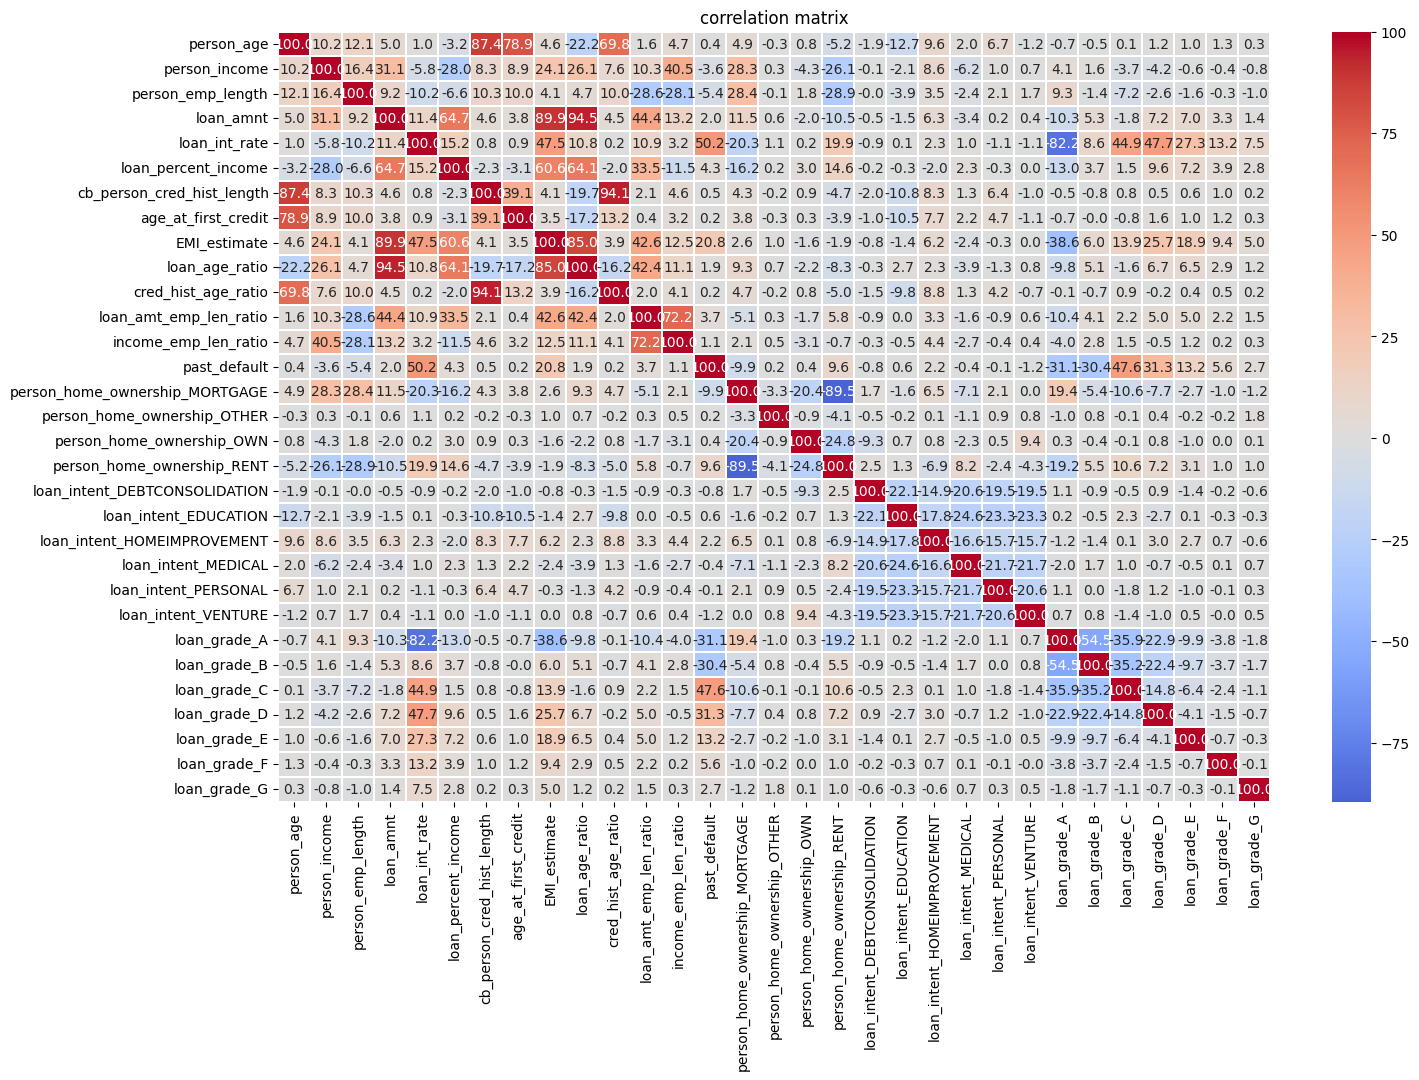

In [25]:
cor_mat=train_ohe[features].corr()
fig= plt.subplots(figsize=(16,10))
x = sns.heatmap(round(100*cor_mat,1), annot=True,fmt='.1f',center=0,linewidths = 0.1,cmap='coolwarm').\
set_title('correlation matrix')
plt.show()

#annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

In [26]:
train[target].value_counts(normalize=True)
train_ohe[target].value_counts(normalize=True)

loan_status
0    0.857618
1    0.142382
Name: proportion, dtype: float64

loan_status
0    0.857618
1    0.142382
Name: proportion, dtype: float64

In [27]:
import re
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.preprocessing import StandardScaler,MinMaxScaler,MaxAbsScaler
from sklearn.model_selection import cross_val_score,GridSearchCV,StratifiedKFold,RepeatedStratifiedKFold,RandomizedSearchCV
from sklearn.metrics import accuracy_score,auc,recall_score,precision_score,precision_recall_curve,confusion_matrix,\
ConfusionMatrixDisplay,classification_report,roc_auc_score,f1_score
from xgboost import XGBClassifier
from sklearn.pipeline import make_pipeline,Pipeline

import seaborn as sns
sns.set(style="darkgrid") #white, dark, whitegrid, darkgrid, ticks

# check version number
import imblearn
print(imblearn.__version__)
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

0.12.3


In [28]:
X_train, X_test, y_train, y_test = train_test_split(train_ohe[features],\
                train_ohe[target],test_size = 0.3, random_state =61, stratify = train_ohe[target])

In [29]:
scaler = StandardScaler()
logreg = LogisticRegression(max_iter = 10000, tol = 1e-6,random_state = 51,penalty  = 'l2',solver = 'sag',C = 0.5)

In [30]:
pipe = Pipeline([('sc', scaler), ('lr', logreg)])
#pipe[0]
#pipe[1]
pipe.fit(X_train[features], y_train)


Pipeline(steps=[('sc', StandardScaler()),
                ('lr',
                 LogisticRegression(C=0.5, max_iter=10000, random_state=51,
                                    solver='sag', tol=1e-06))])

In [31]:
f'intercept is {pipe[1].intercept_}'
coff = pd.DataFrame({'variable' : train_ohe[features].columns, 'coefficient' : pipe[1].coef_.transpose().flatten()})
coff = coff.sort_values(by='coefficient', key=abs,ascending = False).reset_index(drop = True)
coff

'intercept is [-3.1104102]'

,variable,coefficient
0,loan_percent_income,1.327706
1,EMI_estimate,-1.169310
2,loan_int_rate,0.880066
3,person_home_ownership_OWN,-0.799579
4,loan_grade_D,0.660038
5,loan_amnt,0.488331
6,person_home_ownership_RENT,0.466488
7,person_income,-0.316911
8,loan_grade_E,0.295022
9,loan_age_ratio,0.276861


In [32]:
estimator= pipe
pred_bin_tr = estimator.predict(X_train[features])
pred_bin_te = estimator.predict(X_test[features])
#confusion_matrix(y_train,pred_bin_tr)
f'train_rocauc : {round(roc_auc_score(y_train,estimator.predict_proba(X_train[features])[:,1]),4)} ; \
test_rocaauc : {round(roc_auc_score(y_test,estimator.predict_proba(X_test[features])[:,1]),4)}'
f'train_f1_score : {round(f1_score(y_train,pred_bin_tr),4)} ; test_f1_score : {round(f1_score(y_test,pred_bin_te),4)}'
f'train_precision : {round(precision_score(y_train,pred_bin_tr),4)} ; test_precision : {round(precision_score(y_test,pred_bin_te),4)}'
f'train_recall : {round(recall_score(y_train,pred_bin_tr),4)} ; test_recall : {round(recall_score(y_test,pred_bin_te),4)}'
f'train_accuracy : {round(accuracy_score(y_train,pred_bin_tr),4)} ; test_accuracy : {round(accuracy_score(y_test,pred_bin_te),4)}'
f'train_conf : {confusion_matrix(y_train,pred_bin_tr)} ; test_conf : {confusion_matrix(y_test,pred_bin_te)}'

'train_rocauc : 0.9074 ; test_rocaauc : 0.8959'

'train_f1_score : 0.6581 ; test_f1_score : 0.6426'

'train_precision : 0.7909 ; test_precision : 0.7766'

'train_recall : 0.5636 ; test_recall : 0.5481'

'train_accuracy : 0.9166 ; test_accuracy : 0.9132'

'train_conf : [[34335   871]\n [ 2551  3294]] ; test_conf : [[14694   395]\n [ 1132  1373]]'

In [34]:
#classification_report(y_train,pred_bin_tr,output_dict=True,)
classification_report(y_test,pred_bin_te,output_dict=True)

{'0': {'precision': 0.9284721344622773,
  'recall': 0.9738219895287958,
  'f1-score': 0.9506065016982048,
  'support': 15089},
 '1': {'precision': 0.7765837104072398,
  'recall': 0.5481037924151697,
  'f1-score': 0.642639831500117,
  'support': 2505},
 'accuracy': 0.9132090485392748,
 'macro avg': {'precision': 0.8525279224347586,
  'recall': 0.7609628909719828,
  'f1-score': 0.796623166599161,
  'support': 17594},
 'weighted avg': {'precision': 0.9068465517489733,
  'recall': 0.9132090485392748,
  'f1-score': 0.9067587974327614,
  'support': 17594}}

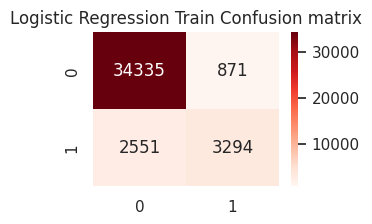

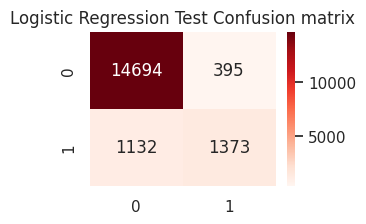

In [35]:
cf_tr = confusion_matrix(y_train,pred_bin_tr);#cf_tr
cf_te = confusion_matrix(y_test,pred_bin_te);#cf_te
fig, ax = plt.subplots(figsize=(3,2)) ;
x = sns.heatmap(cf_tr, annot=True, cmap='Reds',fmt='.0f',).set_title('Logistic Regression Train Confusion matrix')
plt.show()
fig, ax = plt.subplots(figsize=(3,2)) ;
x = sns.heatmap(cf_te, annot=True, cmap='Reds',fmt='.0f',).set_title('Logistic Regression Test Confusion matrix')
plt.show()

In [37]:
logreg_submsn = test[["id"]]
logreg_submsn["loan_status"] = estimator.predict_proba(test_ohe[features])[:,1]
#logreg_submsn.to_csv("logreg_submission.csv",index = False,)

### XGBoost 

In [38]:
# import XGBClassifier
from xgboost import XGBClassifier
# declare parameters
params = {'objective':'binary:logistic',
            'max_depth': 5,
            'learning_rate': 0.05,
            'n_estimators':1000,
            'subsample' : 0.6,
            'colsample_bytree' : 0.5,
            'eval_metric' : "auc",
            'reg_alpha': 1.25,
            'random_state' : 51,
         'early_stopping_rounds' : 25}

# instantiate the classifier 
xgb_clf = XGBClassifier(**params)

# fit the classifier to the training data
xgb_clf.fit(X_train, y_train,verbose = 100,eval_set = [(X_train,y_train),(X_test,y_test)])

[0]	validation_0-auc:0.85863	validation_1-auc:0.84629
[100]	validation_0-auc:0.95034	validation_1-auc:0.93680
[200]	validation_0-auc:0.96150	validation_1-auc:0.94289
[300]	validation_0-auc:0.96910	validation_1-auc:0.94647
[400]	validation_0-auc:0.97433	validation_1-auc:0.94743
[402]	validation_0-auc:0.97440	validation_1-auc:0.94740


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=25,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None,
              num_parallel_tree=None, random_state=51, ...)

In [39]:
estimator= xgb_clf
pred_bin_tr = estimator.predict(X_train[features])
pred_bin_te = estimator.predict(X_test[features])
#confusion_matrix(y_train,pred_bin_tr)
f'train_rocauc : {round(roc_auc_score(y_train,estimator.predict_proba(X_train[features])[:,1]),4)} ; \
test_rocaauc : {round(roc_auc_score(y_test,estimator.predict_proba(X_test[features])[:,1]),4)}'
f'train_f1_score : {round(f1_score(y_train,pred_bin_tr),4)} ; test_f1_score : {round(f1_score(y_test,pred_bin_te),4)}'
f'train_precision : {round(precision_score(y_train,pred_bin_tr),4)} ; test_precision : {round(precision_score(y_test,pred_bin_te),4)}'
f'train_recall : {round(recall_score(y_train,pred_bin_tr),4)} ; test_recall : {round(recall_score(y_test,pred_bin_te),4)}'
f'train_accuracy : {round(accuracy_score(y_train,pred_bin_tr),4)} ; test_accuracy : {round(accuracy_score(y_test,pred_bin_te),4)}'
f'train_conf : {confusion_matrix(y_train,pred_bin_tr)} ; test_conf : {confusion_matrix(y_test,pred_bin_te)}'

'train_rocauc : 0.9733 ; test_rocaauc : 0.9475'

'train_f1_score : 0.8375 ; test_f1_score : 0.8029'

'train_precision : 0.9461 ; test_precision : 0.9201'

'train_recall : 0.7512 ; test_recall : 0.7122'

'train_accuracy : 0.9585 ; test_accuracy : 0.9502'

'train_conf : [[34956   250]\n [ 1454  4391]] ; test_conf : [[14934   155]\n [  721  1784]]'

In [40]:
xgb_submsn = test.loc[:,["id"]]
xgb_submsn["loan_status"] = xgb_clf.predict_proba(test_ohe[features])[:,1]
#xgb_submsn.to_csv("logreg_submission_v2.csv",index = False,)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

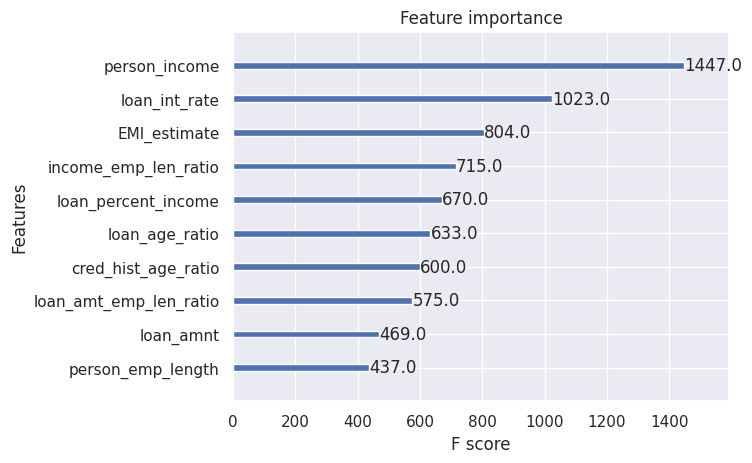

In [41]:
from xgboost import plot_importance
plot_importance(xgb_clf,max_num_features = 10)
plt.show()


### Light GBM

In [42]:
params.pop('eval_metric')
params['objective'] = "binary"
params

'auc'

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


{'objective': 'binary',
 'max_depth': 5,
 'learning_rate': 0.05,
 'n_estimators': 1000,
 'subsample': 0.6,
 'colsample_bytree': 0.5,
 'reg_alpha': 1.25,
 'random_state': 51,
 'early_stopping_rounds': 25}

In [43]:
import lightgbm as lgb
lgb_clf = lgb.LGBMClassifier(**params,verbosity=-1)
lgb_clf.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_test,y_test)],eval_metric = "logloss",)

LGBMClassifier(colsample_bytree=0.5, early_stopping_rounds=25,
               learning_rate=0.05, max_depth=5, n_estimators=1000,
               objective='binary', random_state=51, reg_alpha=1.25,
               subsample=0.6, verbosity=-1)

In [44]:
estimator= lgb_clf
pred_bin_tr = estimator.predict(X_train[features])
pred_bin_te = estimator.predict(X_test[features])
#confusion_matrix(y_train,pred_bin_tr)
f'train_rocauc : {round(roc_auc_score(y_train,estimator.predict_proba(X_train[features])[:,1]),4)} ; \
test_rocaauc : {round(roc_auc_score(y_test,estimator.predict_proba(X_test[features])[:,1]),4)}'
f'train_f1_score : {round(f1_score(y_train,pred_bin_tr),4)} ; test_f1_score : {round(f1_score(y_test,pred_bin_te),4)}'
f'train_precision : {round(precision_score(y_train,pred_bin_tr),4)} ; test_precision : {round(precision_score(y_test,pred_bin_te),4)}'
f'train_recall : {round(recall_score(y_train,pred_bin_tr),4)} ; test_recall : {round(recall_score(y_test,pred_bin_te),4)}'
f'train_accuracy : {round(accuracy_score(y_train,pred_bin_tr),4)} ; test_accuracy : {round(accuracy_score(y_test,pred_bin_te),4)}'
f'train_conf : {confusion_matrix(y_train,pred_bin_tr)} ; test_conf : {confusion_matrix(y_test,pred_bin_te)}'

'train_rocauc : 0.9805 ; test_rocaauc : 0.9514'

'train_f1_score : 0.8467 ; test_f1_score : 0.8012'

'train_precision : 0.949 ; test_precision : 0.9176'

'train_recall : 0.7642 ; test_recall : 0.711'

'train_accuracy : 0.9606 ; test_accuracy : 0.9498'

'train_conf : [[34966   240]\n [ 1378  4467]] ; test_conf : [[14929   160]\n [  724  1781]]'

<Axes: title={'center': 'Metric during training'}, xlabel='Iterations', ylabel='binary_logloss'>

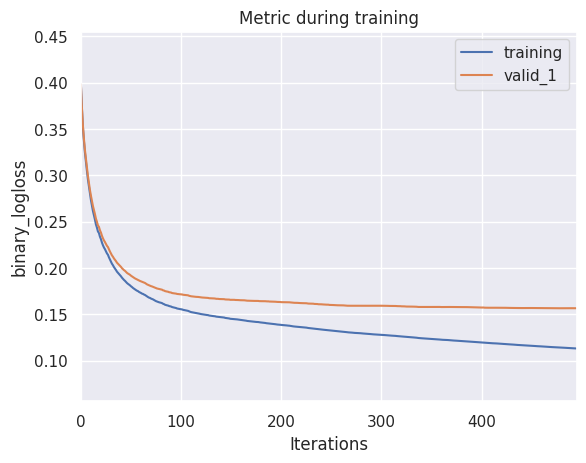

In [45]:
lgb.plot_metric(lgb_clf)

In [46]:
lgbm_submsn = test.loc[:,["id"]]
lgbm_submsn["loan_status"] = lgb_clf.predict_proba(test_ohe[features],)[:,1]
#lgbm_submsn.to_csv("lgbm_submission.csv",index = False,)

### CAT Boost

In [47]:
cat_gbm_cols = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
                'age_at_first_credit', 'EMI_estimate', 'loan_age_ratio',
       'cred_hist_age_ratio', 'loan_amt_emp_len_ratio', 'income_emp_len_ratio',
       'past_default','person_home_ownership','loan_intent','loan_grade']
X_train_cat = train.loc[X_train.index, cat_gbm_cols]
X_test_cat = train.loc[X_test.index, cat_gbm_cols]
y_train_cat = train.loc[y_train.index, target]
y_test_cat = train.loc[y_test.index, target]

In [48]:
from catboost import CatBoostClassifier, Pool
cat_gbm = CatBoostClassifier(n_estimators = 2000, learning_rate=0.05, depth = 5,one_hot_max_size = 8, 
                             random_seed = 51, subsample = 0.7, colsample_bylevel = 0.8,
                            eval_metric = "AUC", early_stopping_rounds = 100, l2_leaf_reg = 1)

eval_dataset = [Pool(data = X_train_cat,label = y_train_cat,cat_features=['person_home_ownership','loan_intent','loan_grade']),
                Pool(data = X_test_cat,label = y_test_cat,cat_features=['person_home_ownership','loan_intent','loan_grade'])]

cat_gbm.fit(X= X_train_cat, y=y_train_cat, plot=True, eval_set= eval_dataset,
            cat_features = ['person_home_ownership','loan_intent','loan_grade'], verbose = 100,)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	test: 0.8699462	test1: 0.8630019	best: 0.8630019 (0)	total: 71.2ms	remaining: 2m 22s
100:	test: 0.9388876	test1: 0.9275449	best: 0.9275449 (100)	total: 1.29s	remaining: 24.3s
200:	test: 0.9468966	test1: 0.9341642	best: 0.9341642 (200)	total: 2.43s	remaining: 21.8s
300:	test: 0.9529664	test1: 0.9382936	best: 0.9382947 (298)	total: 3.59s	remaining: 20.3s
400:	test: 0.9581348	test1: 0.9415268	best: 0.9415389 (399)	total: 4.78s	remaining: 19.1s
500:	test: 0.9617410	test1: 0.9430561	best: 0.9430650 (497)	total: 5.99s	remaining: 17.9s
600:	test: 0.9644160	test1: 0.9440199	best: 0.9440446 (586)	total: 7.18s	remaining: 16.7s
700:	test: 0.9670163	test1: 0.9451527	best: 0.9451769 (698)	total: 8.32s	remaining: 15.4s
800:	test: 0.9692208	test1: 0.9459523	best: 0.9459558 (799)	total: 9.47s	remaining: 14.2s
900:	test: 0.9712706	test1: 0.9470643	best: 0.9470744 (897)	total: 10.6s	remaining: 13s
1000:	test: 0.9731551	test1: 0.9478681	best: 0.9479056 (992)	total: 11.8s	remaining: 11.8s
1100:	test: 0

In [50]:
estimator= cat_gbm
pred_bin_tr = estimator.predict(X_train_cat[cat_gbm_cols])
pred_bin_te = estimator.predict(X_test_cat[cat_gbm_cols])
#confusion_matrix(y_train,pred_bin_tr)
f'train_rocauc : {round(roc_auc_score(y_train,estimator.predict_proba(X_train_cat[cat_gbm_cols])[:,1]),4)} ; \
test_rocaauc : {round(roc_auc_score(y_test,estimator.predict_proba(X_test_cat[cat_gbm_cols])[:,1]),4)}'
f'train_f1_score : {round(f1_score(y_train,pred_bin_tr),4)} ; test_f1_score : {round(f1_score(y_test,pred_bin_te),4)}'
f'train_precision : {round(precision_score(y_train,pred_bin_tr),4)} ; test_precision : {round(precision_score(y_test,pred_bin_te),4)}'
f'train_recall : {round(recall_score(y_train,pred_bin_tr),4)} ; test_recall : {round(recall_score(y_test,pred_bin_te),4)}'
f'train_accuracy : {round(accuracy_score(y_train,pred_bin_tr),4)} ; test_accuracy : {round(accuracy_score(y_test,pred_bin_te),4)}'
f'train_conf : {confusion_matrix(y_train,pred_bin_tr)} ; test_conf : {confusion_matrix(y_test,pred_bin_te)}'

'train_rocauc : 0.9842 ; test_rocaauc : 0.9507'

'train_f1_score : 0.8718 ; test_f1_score : 0.8066'

'train_precision : 0.9608 ; test_precision : 0.9141'

'train_recall : 0.7978 ; test_recall : 0.7218'

'train_accuracy : 0.9666 ; test_accuracy : 0.9507'

'train_conf : [[35016   190]\n [ 1182  4663]] ; test_conf : [[14919   170]\n [  697  1808]]'

In [51]:
cat_bst_submsn = test.loc[:,["id"]]
cat_bst_submsn["loan_status"] = cat_gbm.predict_proba(test[cat_gbm_cols],)[:,1]
#cat_bst_submsn.to_csv("cat_bst_submission.csv",index = False,)

### Ensembling

In [52]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
ensemble_submsn = test.loc[:,["id"]]
ensemble_submsn["xgb_0"] = xgb_clf.predict_proba(test_ohe[features])[:,0]
ensemble_submsn["xgb_1"] = xgb_clf.predict_proba(test_ohe[features])[:,1]

ensemble_submsn["lgbm_0"] = lgb_clf.predict_proba(test_ohe[features],)[:,0]
ensemble_submsn["lgbm_1"] = lgb_clf.predict_proba(test_ohe[features],)[:,1]

ensemble_submsn["cat_bst_0"] = cat_gbm.predict_proba(test[cat_gbm_cols],)[:,0]
ensemble_submsn["cat_bst_1"] = cat_gbm.predict_proba(test[cat_gbm_cols],)[:,1]

ensemble_submsn["tot_prob_0"] = ensemble_submsn[["xgb_0","lgbm_0","cat_bst_0"]].mean(axis = 1) 
ensemble_submsn["tot_prob_1"] = ensemble_submsn[["xgb_1","lgbm_1","cat_bst_1"]].mean(axis = 1) 
ensemble_submsn["loan_status"] = ensemble_submsn[["tot_prob_0","tot_prob_1"]].max(axis = 1)
#np.where(ensemble_submsn.tot_prob_0 > ensemble_submsn.tot_prob_1,0,1)
ensemble_submsn[["id","loan_status"]].to_csv("ensemble1_submission.csv",index = False,)

In [54]:
from sklearn.metrics import confusion_matrix


def custom_score(y_observed, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_observed, y_pred, normalize="all").ravel()
    return tp - 2 * fn - 0.1 * fp


print("Untuned decision threshold: 0.5")
#print(f"Custom score: {custom_score(y_test, cat_gbm.predict(X_train_cat[cat_gbm_cols]))}"
print(f"Custom score: {custom_score(y_test, cat_gbm.predict(X_test_cat[cat_gbm_cols],)):.2f}")

Untuned decision threshold: 0.5
Custom score: 0.02


In [ ]:
%cd /kaggle/input/playground-series-s4e10
!ls
from IPython.display import FileLink
FileLink(r'sample_submission.csv')

# The END 

In [ ]:
!pip install --upgrade scikit-learn

In [ ]:
import sklearn
sklearn.__version__

In [ ]:
from sklearn.model_selection import TunedThresholdClassifierCV
from sklearn.metrics import make_scorer

custom_scorer = make_scorer(
    custom_score, response_method="predict", greater_is_better=True
)

tuned_classifier = TunedThresholdClassifierCV(
    cat_gbm, cv=5, scoring=custom_scorer
).fit(X_train_cat, y_train_cat)

print(f"Tuned decision threshold: {tuned_classifier.best_threshold_:.3f}")
print(f"Custom score: {custom_score(y_test, tuned_classifier.predict(X_test_cat[cat_gbm_cols],)):.2f}")